In [ ]:
#!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import lightgbm
from lightgbm import LGBMRegressor

In [3]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model  tahmin

In [4]:
lgb_model = LGBMRegressor().fit(x_train, y_train)

In [5]:
lgb_model

LGBMRegressor()

In [6]:
y_pred= lgb_model.predict(x_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

Model Tuning

In [8]:
lgbm_parms = {"learning_rate": [0.01, 0.1, 0.5, 1], "max_depth": [1,2,3,4,5,6,7,8,9,10], "n_estimators":[20, 40, 100, 200, 500, 1000]}

In [9]:
lgbm_cv_model = GridSearchCV(lgb_model, lgbm_parms, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [10]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [11]:
# yukrdaki best performdaki değerleri burda giriyoruz
lgbm_tuned = LGBMRegressor(learning_rate= 0.1, max_depth=6, n_estimators=20).fit(x_train, y_train)

In [12]:
y_pred = lgbm_tuned.predict(x_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

degisken onem duzeyleri

In [14]:
lgbm_tuned.feature_importances_*100

array([ 600,  600,    0,  200,  600, 1000, 1300, 1000, 1100,  500, 1000,
       2200,  900, 1800,  200,  400,  400,    0,    0])

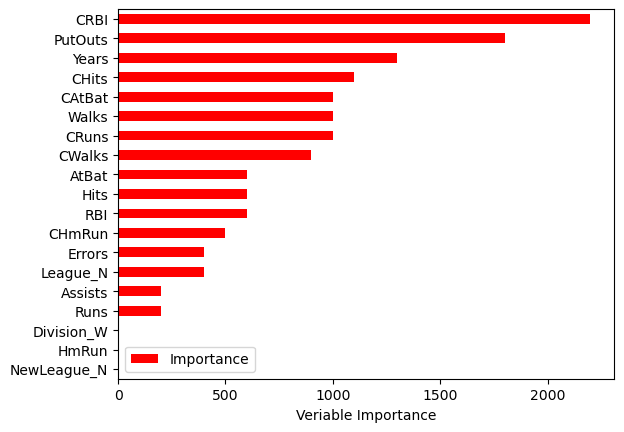

In [15]:
Importance = pd.DataFrame({'Importance': lgbm_tuned.feature_importances_*100 }, index = x_train.columns)
Importance.sort_values(by = 'Importance', axis= 0, ascending = True).plot(kind= 'barh', color = 'r',)
plt.xlabel('Veriable Importance')
plt.gca().lengend_ = None